<a href="https://colab.research.google.com/github/yashpatil454/Retail-Shop-Sales-Prediction-Regression/blob/main/Rossmann_Sales_Prediction_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

##Project Type: Regression

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## <b> Business Problem </b>
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

###Github link: https://github.com/yashpatil454/Retail-Shop-Sales-Prediction-Regression

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Understanding the Data
      - Data Cleaning
      - Missing Data Handling
      - Merging the Datasets
* Exploratory Data Analysis
      - Hypotheses
      - Categorical Features
      - Continuous Features
      - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Baseline Model - Decision Tree
      - Random Forest Model
      - Random Forest Hyperparameter Tuning
      - Random Forest Feature Importance
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
#The default figure size to 8 inches by 5 inches and the figure resolution (dots per inch) to 100.
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting drive and pulling the data.csv
from google.colab import drive
drive.mount('/content/gdrive')
sales_df = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv', parse_dates=['Date'])
stores_df = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/store.csv')

#For local runtime
# sales_df = pd.read_csv('C:/Users/yash.patil/Documents/Python/Retail_Sales_Prediction_Project/Rossmann Stores Data.csv', parse_dates=['Date'])
# stores_df = pd.read_csv('C:/Users/yash.patil/Documents/Python/Retail_Sales_Prediction_Project/store.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Understanding the Data

In [ ]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Observation: There are no null values in Rossmann Stores Data.csv i.e sales_df

In [ ]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Observation: There are seveal null values in store.csv i.e stores_df

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Returns the count of missing (null) values in each column of the stores_df dataframe.
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##Data Preprocessing: Data cleaning and Handling Missing Data 

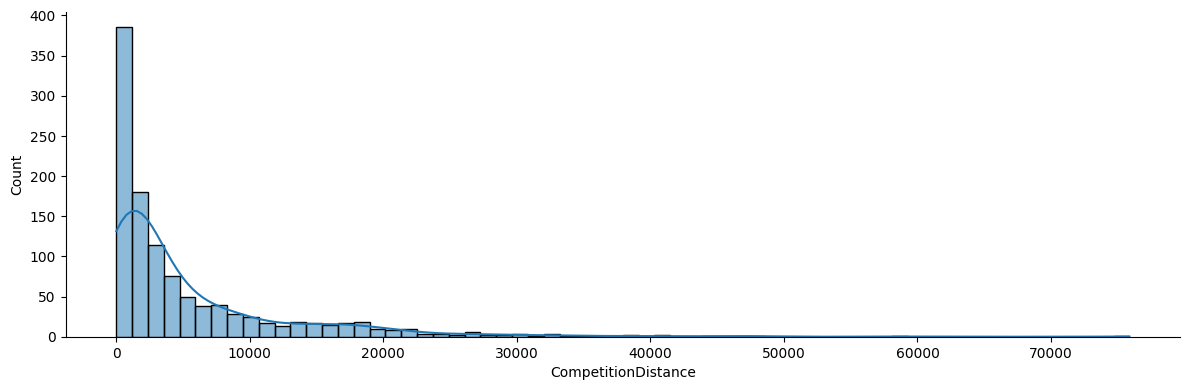

In [ ]:
#Visualizing competition distance to further impute value.
sns.displot(x=stores_df['CompetitionDistance'],kde=True, height=4, aspect=3)

Observation: The distribution plot is skewed to the right, so median is effective for outliers. Therefore, Imputing median value in competition distance.

In [ ]:
stores_df["CompetitionDistance"].fillna(stores_df["CompetitionDistance"].median(), inplace=True)

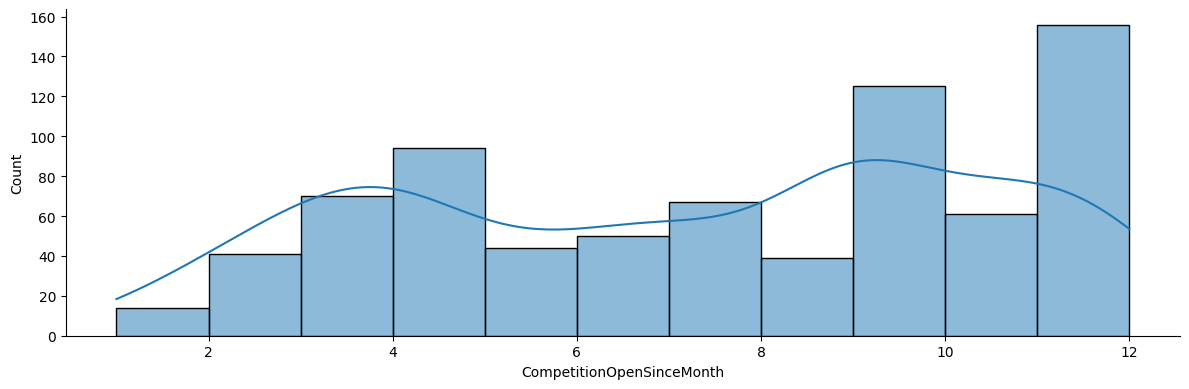

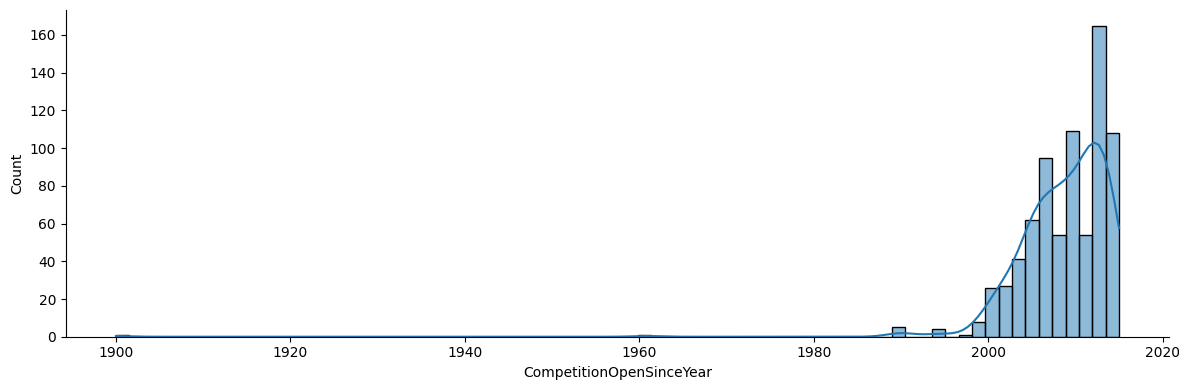

In [ ]:
#Visualizing CompetitionOpenSinceMonth and CompetitionOpenSinceYear to further impute value.
sns.displot(x=stores_df['CompetitionOpenSinceMonth'],kde=True, height=4, aspect=3)
sns.displot(x=stores_df['CompetitionOpenSinceYear'],kde=True, height=4, aspect=3)

Observation: As we have to select one month we will take mode of the distribution and impute the value as it is more likely. Using same strategy with year.

In [ ]:
#Replaces the missing values in the columns with the mode (most frequent value) of each column.
stores_df["CompetitionOpenSinceMonth"].fillna(stores_df["CompetitionOpenSinceMonth"].mode()[0], inplace=True)
stores_df["CompetitionOpenSinceYear"].fillna(stores_df["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [ ]:
# Imputing the nan values of promo2 related columns with 0.
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#Checking if all the missing and NaN values are handled.
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

####Merging the two Datasets

In [ ]:
#Merging the sales_df and stores_df dataframes, using left join, and stores the result in a new dataframe i.e. df.
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [ ]:
df.shape

(1017209, 18)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Observation: Data is merged appropriately and there are no null values in the dataset 'df'. 

##Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset's main characteristics, often through visual methods. When performing EDA on a dataset, it is often useful to classify features as either categorical or continuous.

Categorical features are features that take on a limited number of values. These values are often called "categories" or "classes".

Continuous features are features that can take on any value within a certain range. These features are often numerical and may have an infinite number of possible values. 

It is important to note the distinction between categorical and continuous features when performing EDA because different statistical techniques are appropriate for each type of feature. 

###Framing Hypotheses
Just by observing the head of the dataset and understanding the features by EDA, the following hypotheses could be framed:
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Promotion should be having a positive correlation with Sales.
* Stores are influenced by seasonality, probably before holidays sales would be high.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.



###Categorical Features:

In [ ]:
#Breaking date feature into multiple features such as Year, Month, WeekOfYear, and DayOfYear.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear

In [ ]:
#List of categorical features
categorical_variables = ['DayOfWeek','Month','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                         'Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#Changing StateHoliday '0' into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#Unique values in each categorical feature
for column in categorical_variables:
  print(f'Unique values in {column}: {df[column].unique()}')

Unique values in DayOfWeek: [5 4 3 2 1 7 6]
Unique values in Month: [ 7  6  5  4  3  2  1 12 11 10  9  8]
Unique values in Open: [1 0]
Unique values in Promo: [1 0]
Unique values in StateHoliday: [0 'a' 'b' 'c']
Unique values in SchoolHoliday: [1 0]
Unique values in StoreType: ['c' 'a' 'd' 'b']
Unique values in Assortment: ['a' 'c' 'b']
Unique values in CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values in CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in Promo2: [0 1]
Unique values in Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


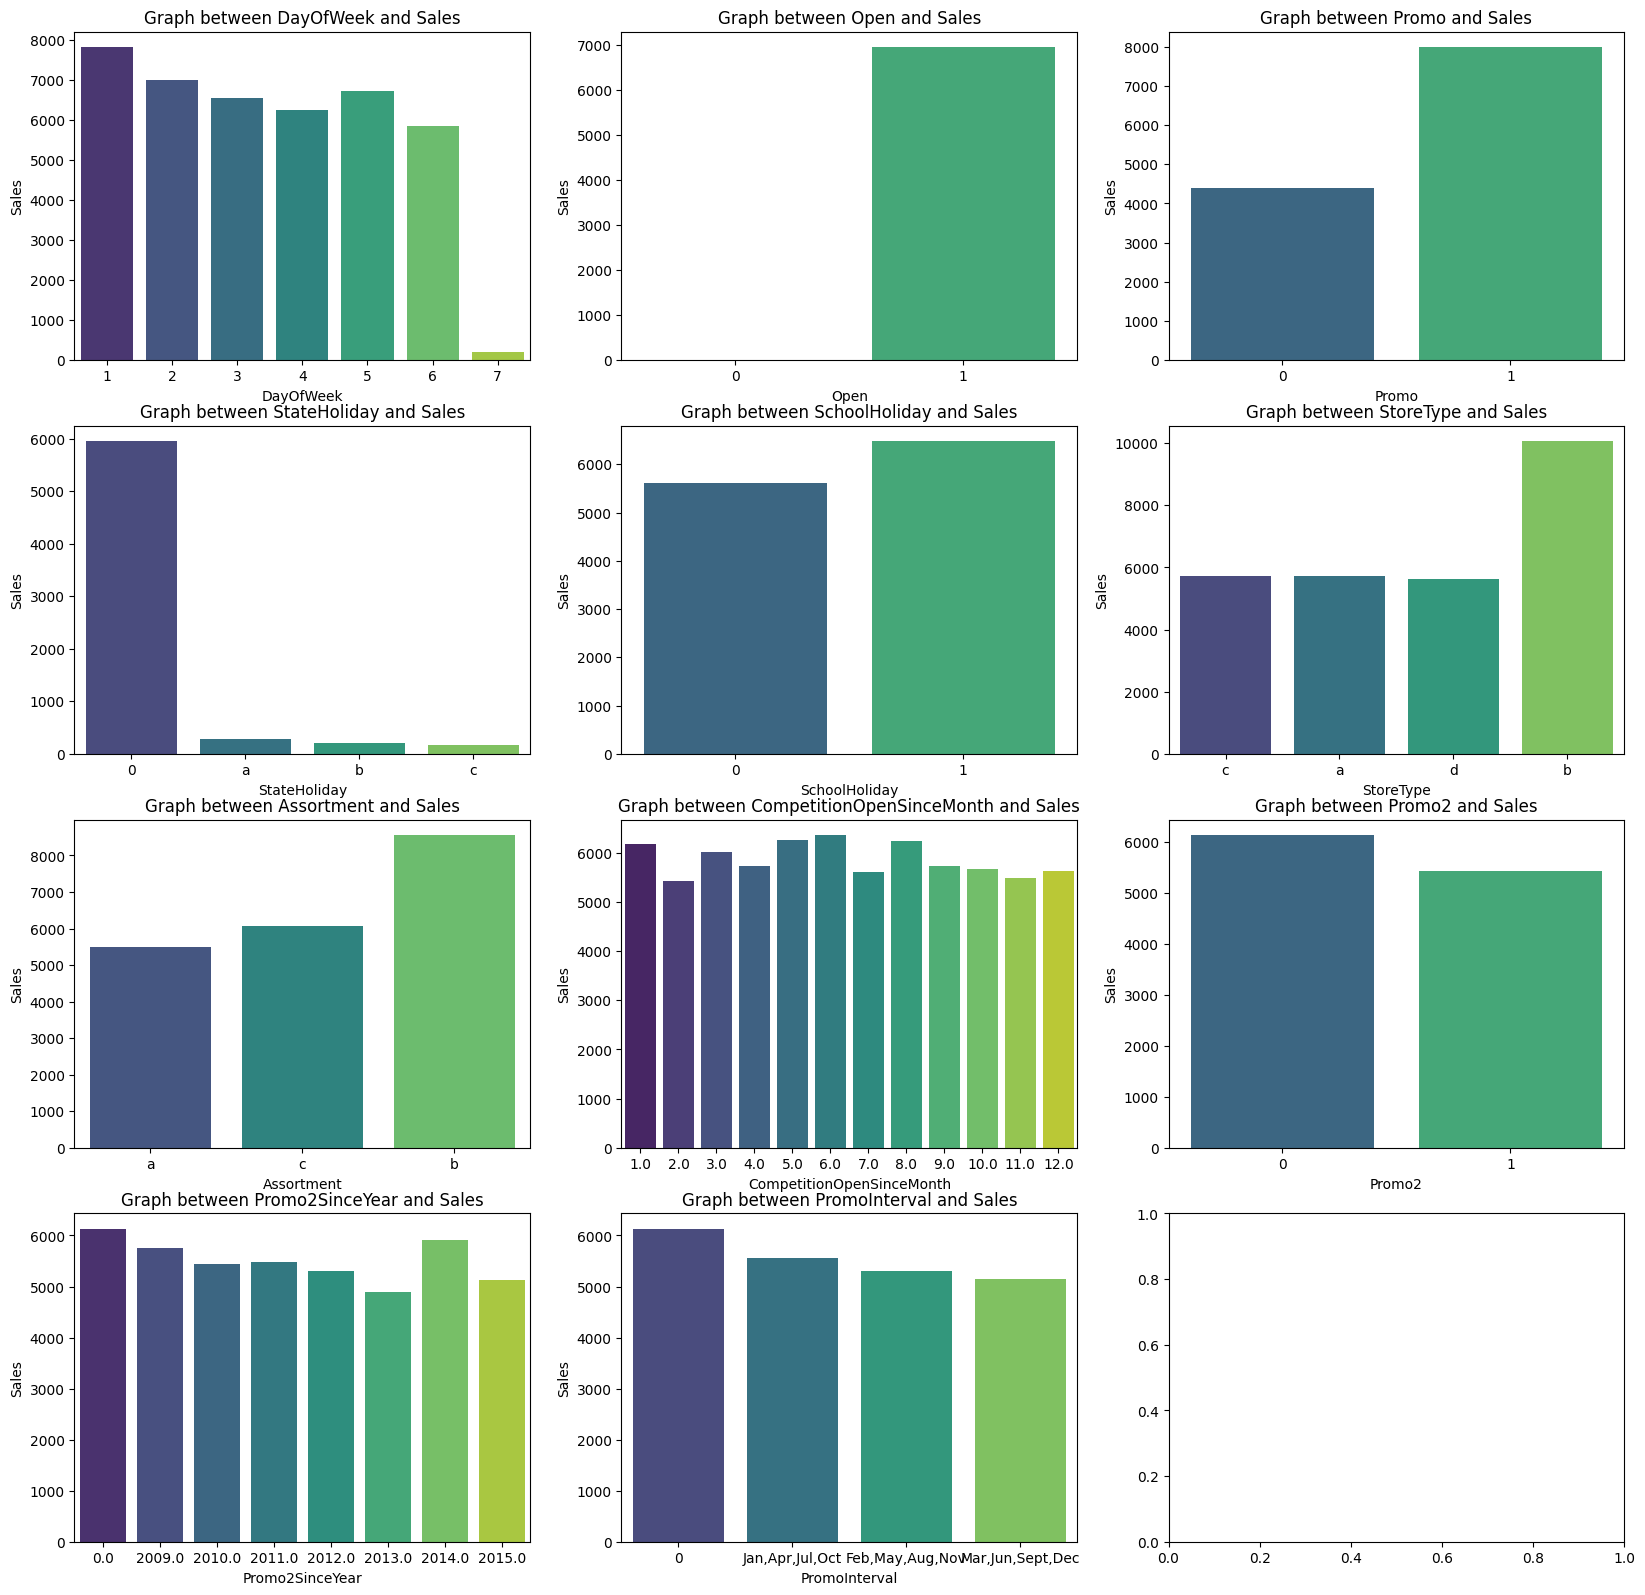

In [ ]:
#plotting all the categorial features for further validation of hypotheses through EDA
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']

fig, axs = plt.subplots(4, 3,figsize=(20, 20))
# j and k is for iterating through axis in subplot
j=0
k=-1
for i in categorical_variables:
# Updating j and k for plotting on subplot  
  k+=1
  if k>2:
    k=0
    j+=1
  sns.barplot(x=df[i], y='Sales', data=df, ci=None, ax=axs[j, k],palette='viridis')
  axs[j,k].set(title = f'Graph between {i} and Sales', xlabel=i, ylabel='Sales')

###Note:
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
Therefore above barplots are only giving a basic understanding of the features for deriving the absolute value of a particular feature use summation function.

####Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest mean sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

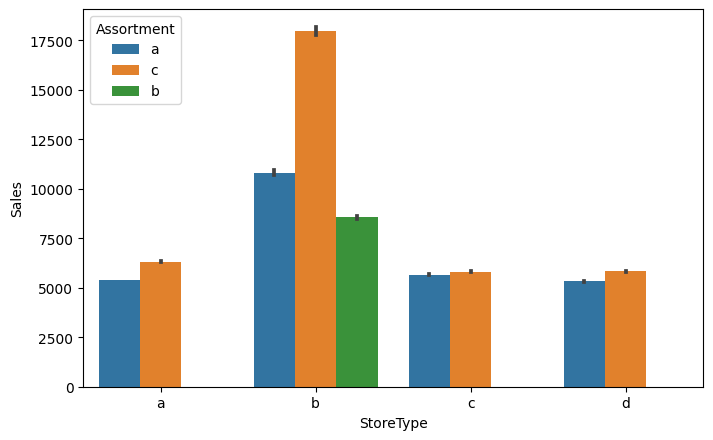

In [ ]:
#Barplot for visualising Storetype and AssortmentType w.r.t Sales 
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=df, order=sorted(df['StoreType'].unique()))

Observation: The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

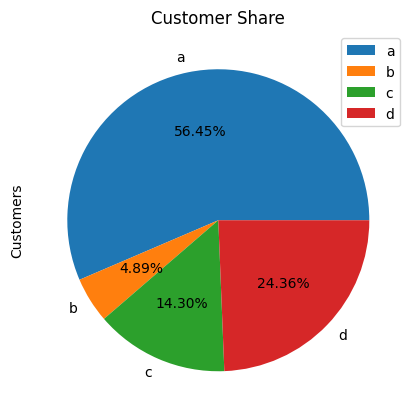

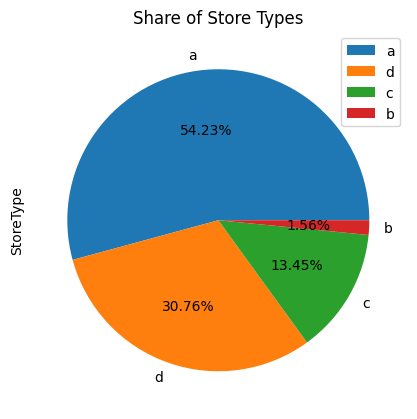

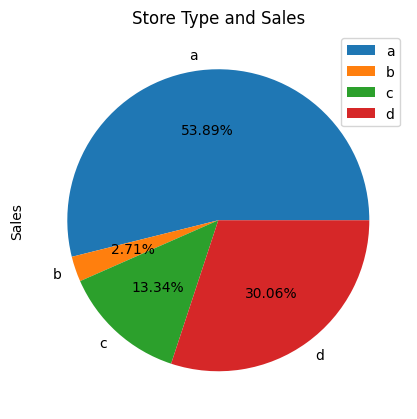

In [ ]:
# Plotting absolute value of sales w.r.t various features
#Customers w.r.t. Storetype
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.2f%%')
plt.show()
#Storetypes in the whole dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.2f%%')
plt.show()
#Storetype w.r.t. Sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.2f%%')
plt.show()

####Observation:
* As per the Customer Share storetype 'a' is by far the largest of all the storetypes so obviously that reflects in the sales generated by storetype 'a'.
* And also the total number of storetype 'a' is greater following storetype 'd' and then storetype 'c'.
* Here we can see if we calculate the summation of sales w.r.t to storetype, storetype 'a' has highest sales and not 'b'.

###Continuous Features:

In [ ]:
#List of categorical features
continuous_variables = ['Sales','Customers','DayOfYear','WeekOfYear','CompetitionDistance']

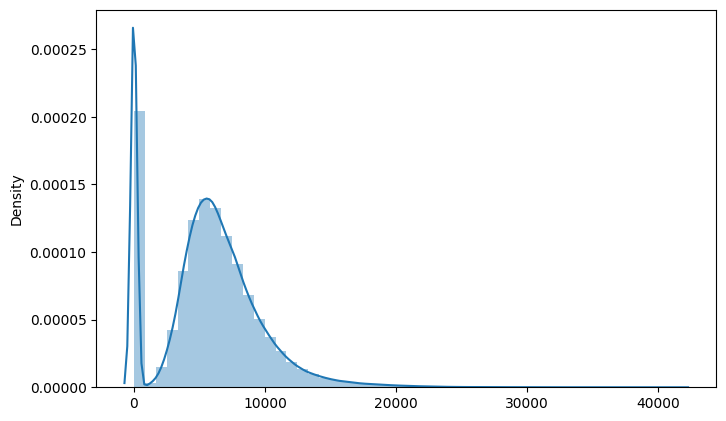

In [ ]:
#Distribution graph of sales
sns.distplot(x=df['Sales'])

Observation: The spike at O for the sales represents the sales where the store was closed due to some reasons.

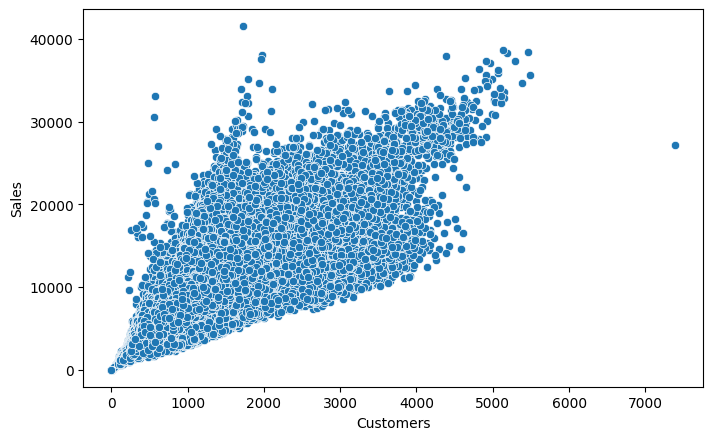

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

Observation: As the number of Customers increased the sales of the stores also increased. Hence they have a positive relation.

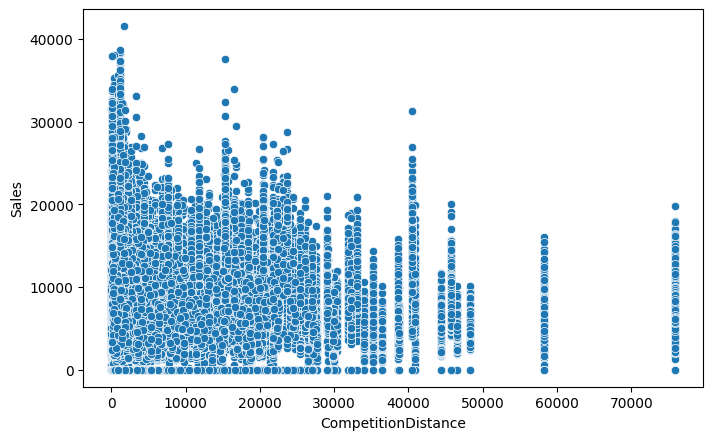

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])


Observation: From the above scatter plot it can be observed stores densely located near each other saw more sales.

In [ ]:
#Caluclating Monthly sales over the years.
sales_2013 = df[df['Year']== 2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = df[df['Year']==2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = df[df['Year']== 2015].groupby('Month')['Sales'].sum().reset_index()

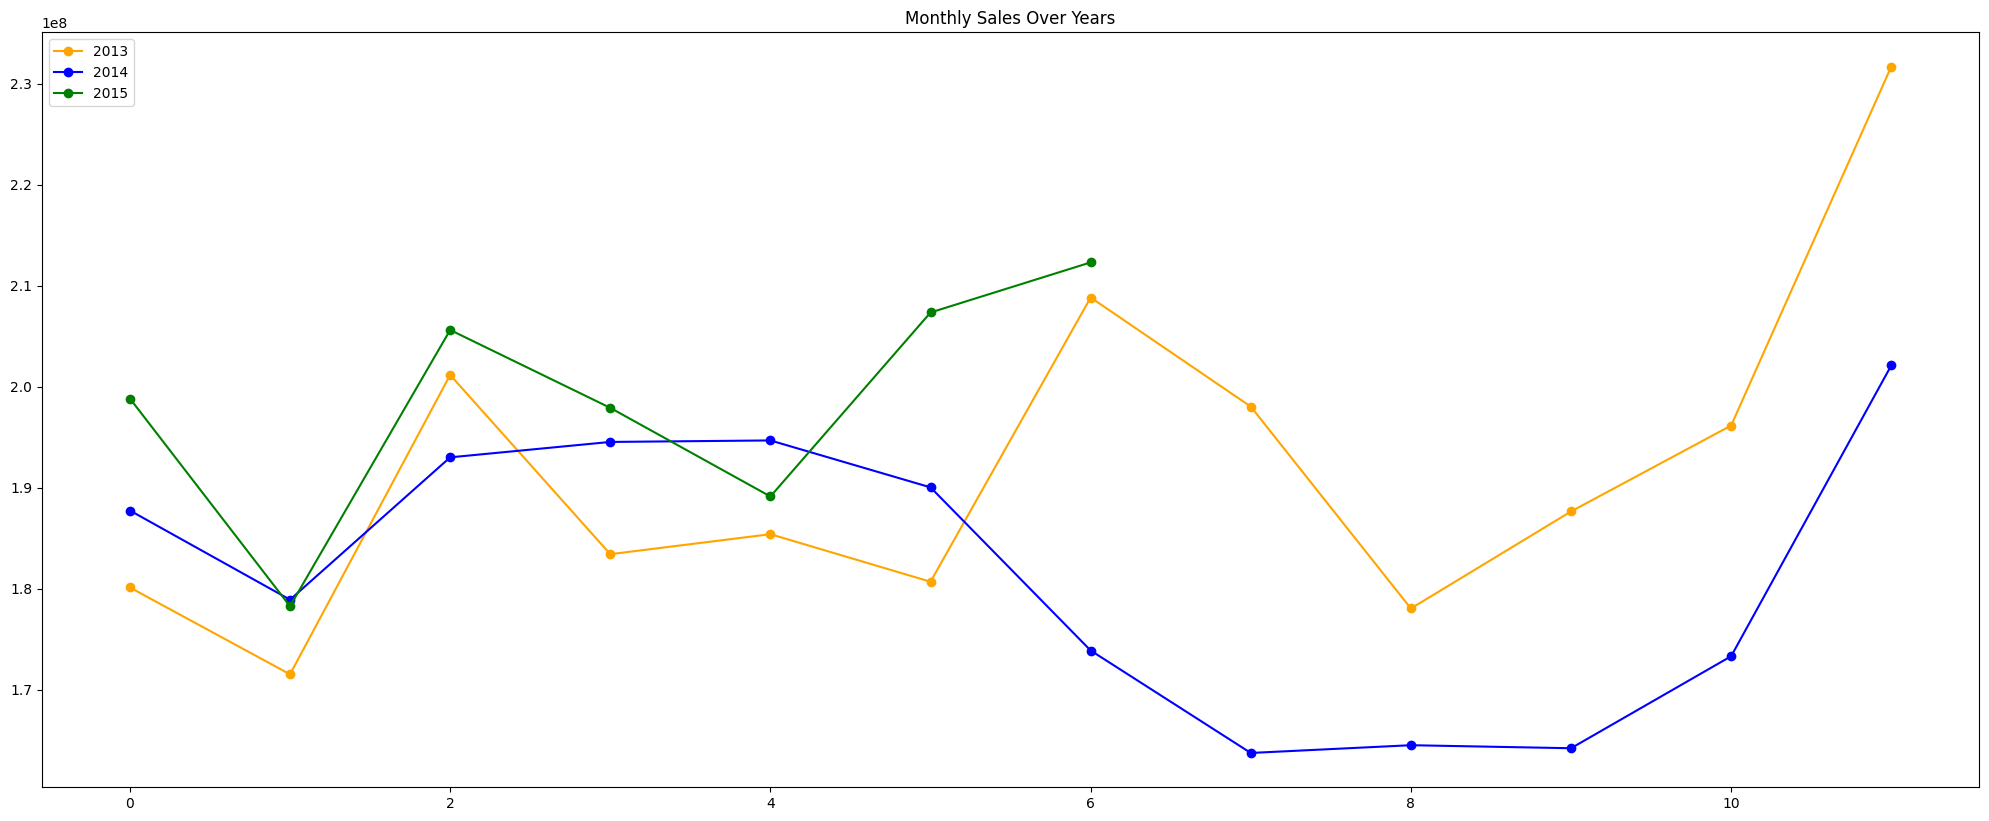

In [ ]:
#Plotting line graph
plt.figure(figsize=(25,10))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange', marker='o')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue', marker='o')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green', marker='o')
plt.title('Monthly Sales Over Years')
plt.legend()

Observation: Sales tend to increase towards the end of the year, possibly due to holiday shopping. In 2014, sales dropped for a few months from July to September, which may have been caused by stores being closed for refurbishment.

###Correlation Matrix:
A correlation matrix is a table that shows the correlation between multiple variables. The values in the cells of the matrix indicate the strength and direction of the correlation between the variables.

The values in a correlation matrix can range from -1 to 1. A value of -1 indicates a strong negative correlation, meaning that as one variable increases, the other variable decreases. A value of 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable also increases. A value of 0 indicates no correlation between the variables.

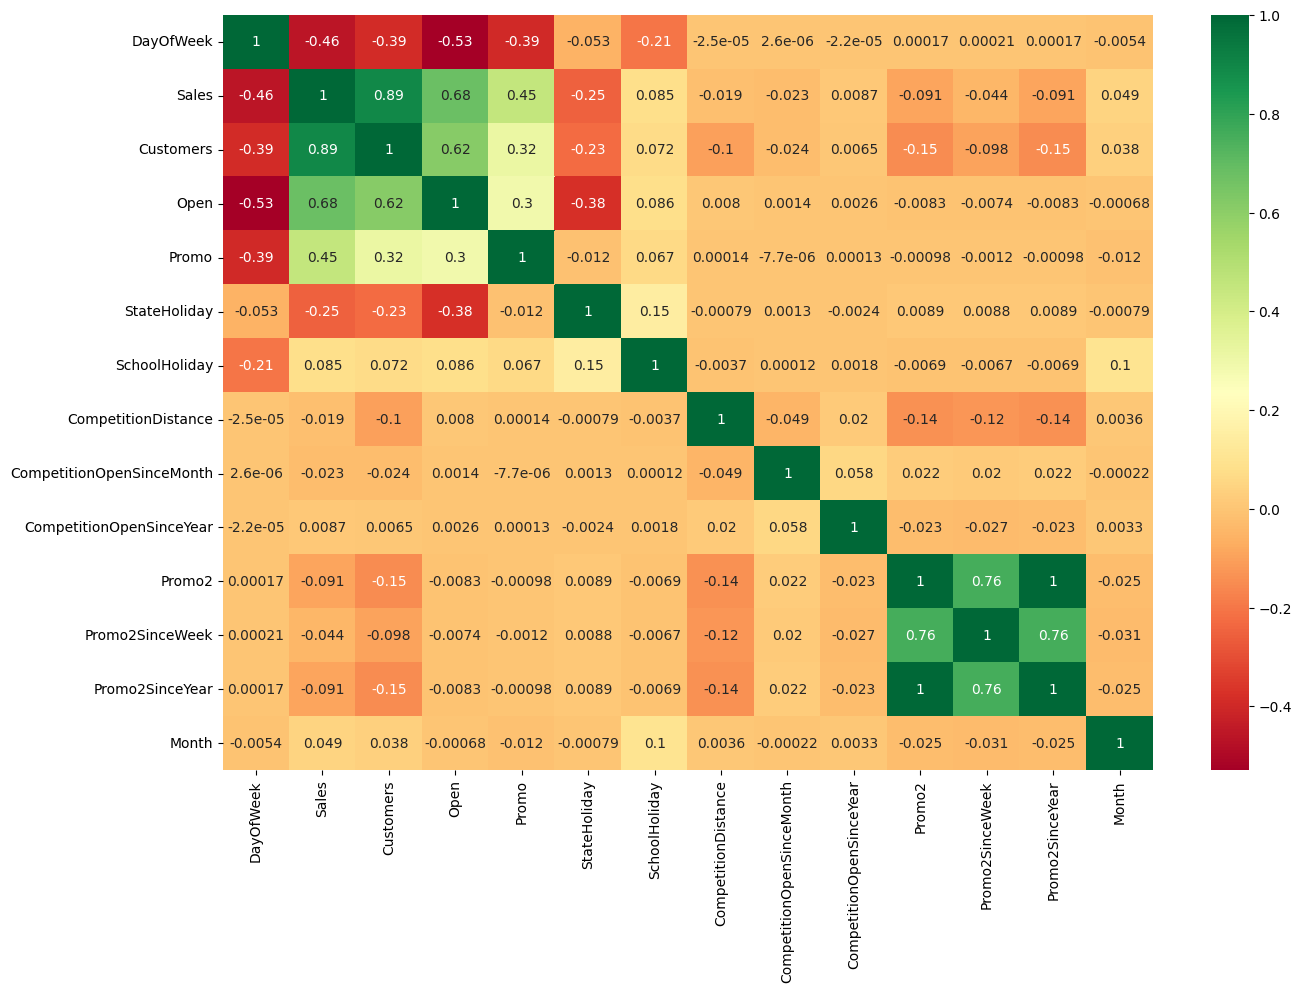

In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(), cmap="RdYlGn", annot=True)

####Observation:
* Most of the strong correlations indicated by correlation matrix has been studied and plotted in the analysis done above.
* The day of the week has a negative correlation with sales, with sales being lower on weekends. The variables "promo", "customers", and "open" have a positive correlation with sales.
* State holidays have a negative correlation with sales, indicating that stores are often closed on state holidays and therefore have lower sales.
* The competition distance has a negative correlation with sales, meaning that as the distance to competing stores increases, sales tend to decrease. This relationship was also observed in a scatterplot earlier.
* There is multicollinearity present in the dataset, as the variables "promo2", "promo2_since_week", and "promo2_since_year" are all telling a similar story and are therefore correlated with each other.


##Conclusions and Hypotheses Validation:
- The data suggests that there were more sales on Monday, which may be due to the fact that stores are usually closed on Sundays and had lower sales for the week. This supports the hypothesis about this trend.
- It is clear that most stores are closed during state and school holidays, but it is notable that more stores were open and had more sales on school holidays than on state holidays.
- Previous observations showed that only store type "b" had all three levels of assortment, while the other store types had two. It seems that some "b" type stores had different products than others, as their revenue per store was significantly higher.
- When comparing sales data from three different years, it is apparent that sales tend to increase towards the end of the year, possibly due to holiday shopping. All stores showed a seasonal increase in sales during the Christmas season, which supports the previous hypothesis. It is also notable that sales dropped for a few months in 2014, possibly due to stores being closed for refurbishment.
- The data shows that promotions have a positive impact on both the number of customers and the amount of sales.
- Based on the data, store types "b" and "d" appear to have good potential, as they had more customers per store and more sales per customer, respectively. While store type "a" and "c" had similar sales numbers per customer and per store, they made up the majority of the stores and had the highest overall revenue. Store type "b" was a small minority of stores, but had higher average sales than the others.
- The data shows that stores with competition within a distance of 0 to 10 km had more sales than stores that were further away.
- There is a positive relationship between the number of customers and the amount of sales, and this relationship helps to explain the data.



##Data manipulation and Feature engineering
Feature engineering is the process of creating new features or modifying existing features in the data to improve the performance of a machine learning model.

Data manipulation and feature engineering are important because they can significantly impact the performance of a machine learning model. Careful manipulation and engineering of the features in the data can help to improve the accuracy and robustness of the model, and can also help to reduce overfitting.

In [ ]:
#Taking into consideration only those observations that have non-zero Sales value. Identifying it on the basis of store is open or closed
df = df[df.Open != 0]
df.drop('Open', axis=1, inplace=True)

Observation: There is no use of considering the observations that has zero sales. Therefore, dropping the rows.

In [ ]:
#Modifying the StateHoliday feature into boolean
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

Observation: Converting StateHoliday as a boolean feature because we are not interested which type of holiday it is.

In [ ]:
#Calculating total months from when competitions are opened and combining into one feature.
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
#If the competition is opened after a particular observation was recorded it will result in negative value. So, correcting the neg. values.
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#Dropping useless columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

Observations: Combining CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns and handling negative values if in case competition is opened after a particular observation was recorded it will result in negative value.

In [ ]:
#Calculating total months from when Promo2 is applicable and combining into one feature.
df['Promo2Open'] = (df['Year'] - df['Promo2SinceYear'])*12 + (df['WeekOfYear'] - df['Promo2SinceWeek'])*0.25
#If the competition is opened after a particular observation was recorded it will result in negative value. So, correcting the neg. values.
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df['Promo2']
#Dropping useless columns
df.drop(['Promo2SinceYear','Promo2SinceWeek'], axis=1,inplace=True)

Observation: To convert weeks to months, you can divide the number of weeks by the number of weeks in a month. One month is typically considered to have 4 weeks. Therefore, have taken 1/4 = 0.25 as the converting value.

In [ ]:
#Creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  if type(df['PromoInterval']) == str:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  else:
    return 0
#Applying 
df['Promo2running'] = df.apply(promo2running,axis=1)*df['Promo2']
#Dropping useless columns
df.drop(['PromoInterval'],axis=1,inplace=True)

In [ ]:
#Setting date and store as index
df.set_index(['Date','Store'],inplace=True)
#Sorting
df.sort_index(inplace=True)

Observation: As we will be forecasting the sales we need date and store number on the index position.

In [ ]:
df.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

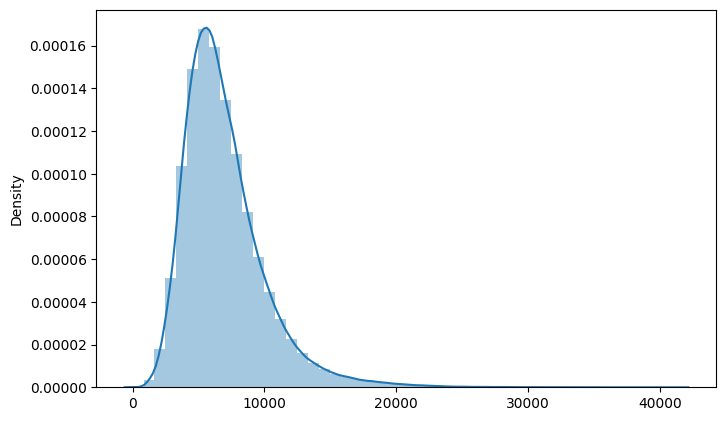

In [ ]:
#Checking Sales Distribution graph
sns.distplot(x=df['Sales'])

Observation: The Sales distribution graph is Right Skewed.

In [ ]:
#Logarithmic transformation
df['Sales'] = np.log(df['Sales'])
df.drop(df[df['Sales'] == float("-inf")].index,inplace=True)

Observation: The natural logarithmic transformation is a common technique in data analysis that can help to reduce the influence of outliers, stabilize variance, and improve the normality of the data distribution.

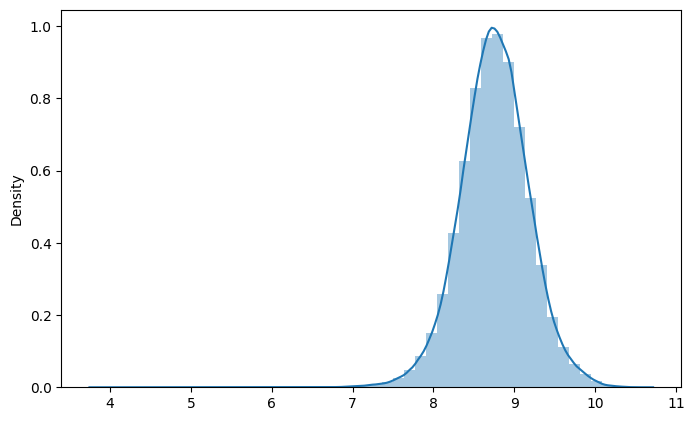

In [ ]:
#Checking if Logarithmic transformation is applied to the Sales feature
sns.distplot(x=df['Sales'])

###Outlier Detection and Treatment

In [ ]:
#If Z-score of the data point is greater than threshold then we will consider it as an outlier.
outlier = []
threshold  = 3
mean = np.mean(df['Sales'])
std = np.std(df['Sales'])
for val in df['Sales']:
  z_score = (val - mean)/std
  if z_score > threshold:
    outlier.append(val)

print(f'Total no. of outliers are {len(outlier)}')

Total no. of outliers are 1559


###Z-Score
$Z = \frac{X - \mu}{\sigma}$

###Where:
- X is the data point
- mu is the mean of the dataset
- sigma is the standard deviation of the dataset

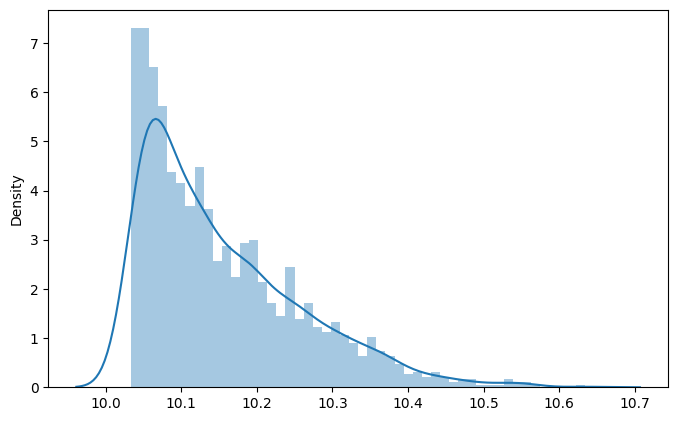

In [ ]:
sns.distplot(outlier, bins = 50)

Observation: As we can see in the outliers distribution plot sales after 10.25 are pretty low. Hence on basis of overall percentage we will decide to exclude  outliers or not.

In [ ]:
outlier = df.loc[df['Sales']> 10.25]

In [ ]:
#Percentage of outliers in the dataset.
print(f'Percentage of outliers in the dataset are {(len(outlier)/len(df)*100)}')

Percentage of outliers in the dataset are 0.03256989499465854


Observation: As the outliers make 0.03% of total dataset it is negligible so we can ignore it.

##Modeling
**Factors affecting in choosing the model:**
 
The choice of algorithm for this analysis is influenced by various considerations, such as the nature of the problem, the desired output, the characteristics of the data (type, size, number of features, etc.), and the available computational resources. The specific dataset under examination features a multivariate time series relationship with sales, meaning that linear assumptions cannot be made. Additionally, this dataset has patterns such as peak days and festive seasons that would likely be treated as outliers in simple linear regression. Additionally, the dataset has X columns, with 30% continuous and 70% categorical features. As the business prefers interpretable models, decision-based algorithms may be more appropriate for this dataset with a higher proportion of categorical data.

In [ ]:
#Slicing the dataset and taking latest 6 weeks for validation.
df1 = df
#Training Data
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df1.loc[start_train:end_train]
#Testing Data
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df1.loc[start_test:end_test]

In [ ]:
#Splitting the test and train dataset.
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]

In [ ]:
#Encoding the categorical columns.
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

#Fitting the data to further extract feature names.
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
X_test.drop(categorical_cols,axis=1,inplace=True)

In [ ]:
#Saving files to drive
df.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/cleaned_df.csv')
df_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/df_train.csv')
df_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/df_test.csv')
X_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_train.csv')
X_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_test.csv')
y_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_train.csv')
y_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_test.csv')

In [ ]:
y_train

Sales
Date       Store          
2013-01-01 85     8.347590
           259    8.832150
           262    9.756552
           274    8.039802
           335    7.783641
...                    ...
2015-06-14 948    9.342946
           1045   8.214736
           1081   8.658866
           1097   9.531554
           1099   8.468213

[798486 rows x 1 columns]

In [ ]:
#Scaling the data for better model predictions.
from sklearn.preprocessing import StandardScaler

#Scaling the train and test data.
scale = StandardScaler()
X_train[list(X_train.columns)] = scale.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scale.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

###Building Models

* First we will create a Baseline Model a simple Decision Tree.
* Then we will use RandomForestRegressor
* Finally we will tune the RandomForestRegressor Model and compare if there is improvement in the predictions made by our model, using metrics.

###Baseline Model: Decision Tree Regressor

A DecisionTreeRegressor baseline model is a basic model that serves as a starting point for a more complex model. It can be used to get a rough idea of the performance of a more complex model, or to compare the performance of different models.

It is simple to implement, easy to interpret, and can handle categorical and numerical data. It can also handle missing values and outliers, but it can be prone to overfitting if not fine-tuned properly.

In [ ]:
#Importing ML libraries.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing metrics for model evaluation.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Fitting Baseline Model
dt_regressor = DecisionTreeRegressor(random_state=45)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=45)

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
comparison_df = pd.DataFrame(columns = comparison_columns)

In [ ]:
#Creating a method for model evaluation that gives us the calculated metrics.
def model_eval(model, model_name):
  #making predictions
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  #Calculating metrices
  #Mean Absolute Error
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),4)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),4) 
  #Mean Squared Error 
  MSE_train = round(mean_squared_error(y_train,y_pred_train),4)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),4)
  #Root Mean Squared Error 
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),4)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),4)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),4)
  R2_test = round(r2_score(y_test, y_pred_test),4)
  #Adjusted R2
  n1 = len(y_train)
  n2 = len(y_test)
  k1 = X_train.shape[1]
  k2 = X_test.shape[1]
  Adj_r2_train = round(1 - (1-R2_train) * (n1-1) / (n1-k1-1), 4)
  Adj_r2_test = round(1 - (1-R2_test) * (n2-1) / (n2-k2-1), 4)

  #Printing the results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #plotting the predictions
  y_true = y_test.copy()
  y_true['Pred Sales'] = y_pred_test.tolist()
  df_plot = y_true.reset_index(level=['Date']).groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = df_plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 15)

  #Saving our results
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  return metric_scores

The Mean Absolute Error for the validation set is 0.1982
The Mean Squared Error for the validation set is 0.0748
The Root Mean Squared Error for the validation set is 0.2735
The R^2 for the validation set is 0.9206
The Adjusted R^2 for the validation set is 0.9206


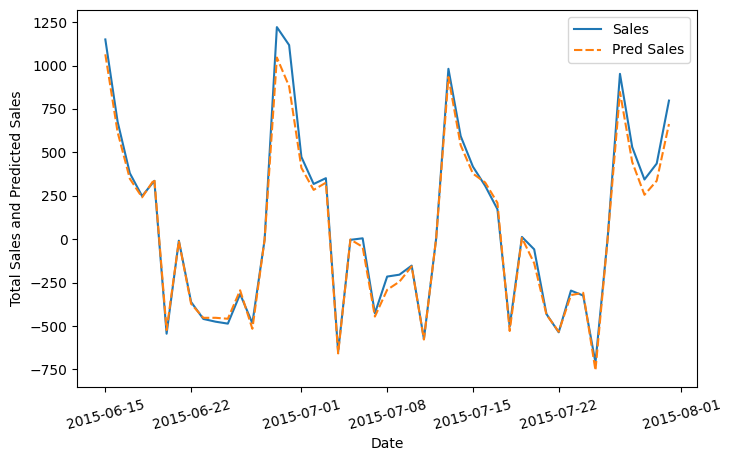

In [ ]:
#Evaluating the model by visualizing it and by metrics
decision_tree = model_eval(dt_regressor, 'Decision Tree Regressor')
comparison_df = comparison_df.append(pd.DataFrame([decision_tree], columns=comparison_df.columns), ignore_index=True)

###Pickling the model :)

Pickling is particularly useful when working with machine learning models because training a model can take a long time, and it's often useful to save the model so that you don't have to retrain it every time you want to use it. 

In [ ]:
#Saving the trained Decesion Tree Regressor model on the drive
pickle.dump(dt_regressor, open("/content/gdrive/MyDrive/Retail Sales Prediction/Decision_Tree_Model.pkl", "wb"))

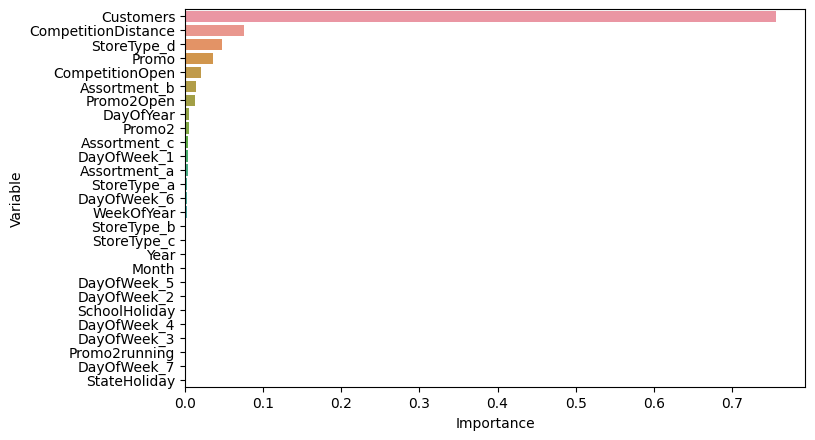

In [ ]:
#Plotting the important features in descending manner.
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": dt_regressor.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

In [ ]:
feature_imp[9:]['Variable'].tolist()

['Assortment_c',
 'DayOfWeek_1',
 'Assortment_a',
 'StoreType_a',
 'DayOfWeek_6',
 'WeekOfYear',
 'StoreType_b',
 'StoreType_c',
 'Year',
 'Month',
 'DayOfWeek_5',
 'DayOfWeek_2',
 'SchoolHoliday',
 'DayOfWeek_4',
 'DayOfWeek_3',
 'Promo2running',
 'DayOfWeek_7',
 'StateHoliday']

In [ ]:
X_train.drop(columns=feature_imp[9:]['Variable'].tolist(), inplace=True)
X_test.drop(columns=feature_imp[9:]['Variable'].tolist(), inplace=True)

###Note:
Feeding only features that has higher importance to the RandomForestRegressor and Tuned RandomForestRegressor to avoid computation inefficiency and also to reduce dimensionality.  

In [ ]:
#Saving the cleaned dataset and splitted data to gdrive for further use.
df.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/cleaned_df_scaled.csv')
df_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/df_train_scaled.csv')
df_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/df_test_scaled.csv')
X_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_train_scaled.csv')
X_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_test_scaled.csv')
y_train.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_train_scaled.csv')
y_test.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_test_scaled.csv')

###RandomForestRegressor:

Random Forest Regressor is an ensemble learning method for regression that uses multiple decision trees to improve the performance and stability of the model. The decision trees are built independently and then combined to produce a final prediction. It reduces the variance of the model by averaging the results of multiple decision trees. It also helps to reduce overfitting that may occur in decision trees.

In [ ]:
#Initializing the model with basic parameters and fitting the model
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

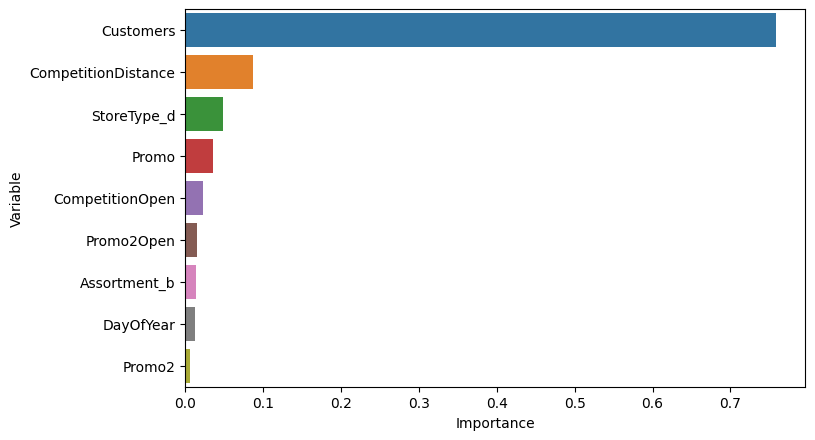

In [ ]:
#Visualizing the important features.
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": randomForest.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

The Mean Absolute Error for the validation set is 0.1576
The Mean Squared Error for the validation set is 0.0446
The Root Mean Squared Error for the validation set is 0.2111
The R^2 for the validation set is 0.9527
The Adjusted R^2 for the validation set is 0.9527


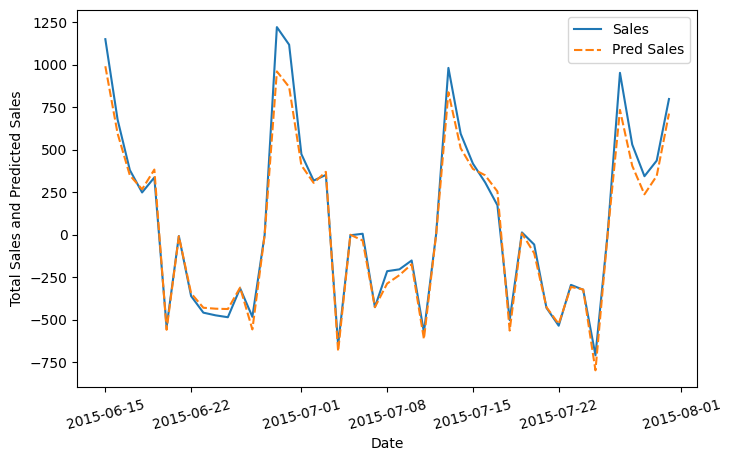

In [ ]:
#Evaluating the model by visualizing it and by metrics
Random_forest = model_eval(randomForest, 'Random Forest Regressor')
comparison_df = comparison_df.append(pd.DataFrame([Random_forest], columns=comparison_df.columns), ignore_index=True)

###Pickling the model :) 

In [ ]:
#Saving the trained Decesion Tree Regressor model on the drive
pickle.dump(randomForest, open("/content/gdrive/MyDrive/Retail Sales Prediction/Random_Forest_Model.pkl", "wb"))

In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(randomForest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


####Observation:
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

In [ ]:
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.0000,0.0000,0.0011,1.0000,1.0000,0.1982,0.0748,0.2735,0.9206,0.9206
1,Random Forest Regressor,0.0472,0.0041,0.0640,0.9959,0.9959,0.1576,0.0446,0.2111,0.9527,0.9527


In [ ]:
#Saving the comparison_df to drive for further comparison 
comparison_df.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/comparison_df.csv')